In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [2]:
filenames = ['data/austen-brontë/Austen_Emma.txt','data/austen-brontë/Austen_Pride.txt','data/austen-brontë/Austen_Sense.txt','data/austen-brontë/CBronte_Jane.txt','data/austen-brontë/CBronte_Professor.txt','data/austen-brontë/CBronte_Villette.txt']

In [3]:
vectorizer = CountVectorizer(input='filename', stop_words='english')

In [4]:
dtm = vectorizer.fit_transform(filenames)

In [5]:
vocab = vectorizer.get_feature_names()

In [10]:
print vocab[109:130]

[u'_be_', u'_been_', u'_benitier_', u'_beyond_', u'_blanc', u'_blasee_', u'_blunder_', u'_boiled_', u'_bonne', u'_bonne_', u'_borrowed_', u'_both_', u'_boulanger_', u'_bride_', u'_broke_', u'_callant_', u'_can', u'_can_', u'_cannot', u'_cannot_', u'_carafe_']


In [11]:
len(vocab)

22555

In [12]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [13]:
dtm.shape

(6, 22555)

In [18]:
dtm.toarray()

array([[2, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1]], dtype=int64)

In [19]:
vocab = np.array(vocab)

In [20]:
vocab[100:500]

array([u'_any_', u'_appropriation_', u'_apropos', u'_are_', u'_as_',
       u'_assistance_', u'_at_', u'_au', u'_ayant', u'_be_', u'_been_',
       u'_benitier_', u'_beyond_', u'_blanc', u'_blasee_', u'_blunder_',
       u'_boiled_', u'_bonne', u'_bonne_', u'_borrowed_', u'_both_',
       u'_boulanger_', u'_bride_', u'_broke_', u'_callant_', u'_can',
       u'_can_', u'_cannot', u'_cannot_', u'_carafe_', u'_caro_',
       u'_carre_', u'_cause_', u'_ceinture', u'_chapeau', u'_chaperon_',
       u'_chef', u'_child_', u'_chose_', u'_clairvoyante_', u'_coiffeurs_',
       u'_compassion_', u'_compelled_', u'_compliments_', u'_could_',
       u'_court_', u'_courtship_', u'_cultivate_', u'_de_', u'_did_',
       u'_dissolved_', u'_dixon_', u'_dixons_', u'_do', u'_do_',
       u'_doubts_', u'_each_', u'_eau', u'_eighteen_', u'_eleves_',
       u'_elton_', u'_engagement_', u'_entree_', u'_etcetera_',
       u'_evening_', u'_ever_', u'_excessively_', u'_fair_', u'_feel_',
       u'_feeling_', u'

In [21]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [22]:
filenames[0]

'data/austen-bront\xc3\xab/Austen_Emma.txt'

In [25]:
house_idx = list(vocab).index('house')
home = [dtm[i, house_idx] for i in range(len(dtm.toarray()))]
house = [dtm[i, vocab == 'house'][0] for i in range(len(dtm.toarray()))]
abrupt = [dtm[i, vocab == 'abrupt'][0] for i in range(len(dtm.toarray()))]

In [27]:
home

[95, 107, 161, 182, 93, 129]

In [28]:
from sklearn.metrics.pairwise import euclidean_distances

In [29]:
euc_dist = euclidean_distances(dtm)

In [30]:
np.round(euc_dist, 2)

array([[    0.  ,  2013.08,  2274.86,  2105.59,  2425.99,  2417.68],
       [ 2013.08,     0.  ,  1698.65,  1725.16,  1639.36,  2001.76],
       [ 2274.86,  1698.65,     0.  ,  1843.98,  1568.48,  1895.96],
       [ 2105.59,  1725.16,  1843.98,     0.  ,  1571.07,  1342.8 ],
       [ 2425.99,  1639.36,  1568.48,  1571.07,     0.  ,  1509.63],
       [ 2417.68,  2001.76,  1895.96,  1342.8 ,  1509.63,     0.  ]])

In [31]:
euc_dist[1,3]

1725.162021376543

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
cos_dist = 1 - cosine_similarity(dtm)

In [34]:
np.round(cos_dist, 2)

array([[-0.  ,  0.3 ,  0.41,  0.33,  0.46,  0.44],
       [ 0.3 , -0.  ,  0.4 ,  0.33,  0.46,  0.45],
       [ 0.41,  0.4 ,  0.  ,  0.39,  0.47,  0.42],
       [ 0.33,  0.33,  0.39, -0.  ,  0.21,  0.18],
       [ 0.46,  0.46,  0.47,  0.21,  0.  ,  0.17],
       [ 0.44,  0.45,  0.42,  0.18,  0.17, -0.  ]])

In [35]:
cos_dist[1,3]

0.33182386753253024

In [40]:
norms = np.sqrt(np.sum(dtm.T * dtm, axis=1, keepdims=True))

In [95]:
dtm_normed = dtm / norms

In [98]:
similar = np.dot(dtm_normed, dtm_normed.T)

In [100]:
np.round(similar, 2)

array([[ 1.  ,  0.7 ,  0.59,  0.67,  0.54,  0.56],
       [ 0.7 ,  1.  ,  0.6 ,  0.67,  0.54,  0.55],
       [ 0.59,  0.6 ,  1.  ,  0.61,  0.53,  0.58],
       [ 0.67,  0.67,  0.61,  1.  ,  0.79,  0.82],
       [ 0.54,  0.54,  0.53,  0.79,  1.  ,  0.83],
       [ 0.56,  0.55,  0.58,  0.82,  0.83,  1.  ]])

In [105]:
similar[1,3]

0.66817613246747398

In [41]:
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
%matplotlib inline

In [42]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
euc_pos = mds.fit_transform(euc_dist)

In [43]:
xs, xy = euc_pos[:,0], euc_pos[:,1]
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

In [44]:
def plot_similar(xs,xy, names):
    for x,y, name in zip(xs,xy,names):
        color = 'orange' if "Austen" in name else 'skyblue'
        plt.scatter(x,y, c=color)
        plt.text(x,y, name)

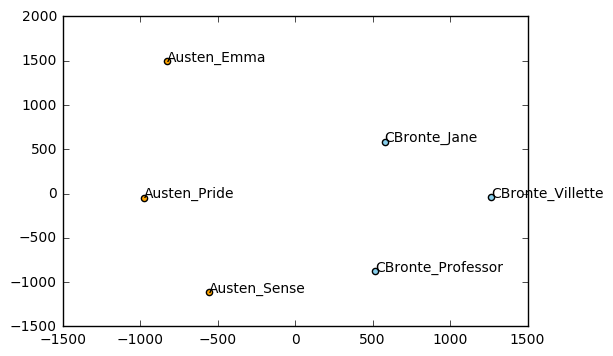

In [45]:
plot_similar(xs,xy,names)

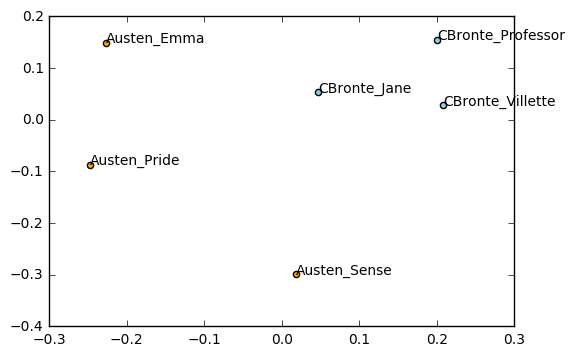

In [46]:
cos_pos = mds.fit_transform(cos_dist)
plot_similar(cos_pos[:,0], cos_pos[:,1], names)

In [48]:
sim_pos = mds.fit_transform(similar)
plot_similar(sim_pos[:,0], sim_pos[:,1], names)

In [49]:
mds3 = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos = mds3.fit_transform(cos_dist)

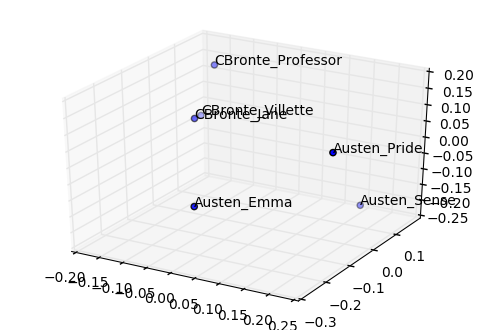

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
     ax.text(x, y, z, s) 
plt.show()

In [51]:
from scipy.cluster.hierarchy import ward, dendrogram

In [52]:
link_matrix = ward(cos_dist)

{'color_list': ['g', 'g', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.2441317547257546, 0.2441317547257546, 0.0],
  [0.0, 0.35528008250356924, 0.35528008250356924, 0.2441317547257546],
  [0.0, 0.4291349883566335, 0.4291349883566335, 0.0],
  [0.0, 0.62667301180027046, 0.62667301180027046, 0.4291349883566335],
  [0.35528008250356924,
   1.028304558688526,
   1.028304558688526,
   0.62667301180027046]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'ivl': ['CBronte_Jane',
  'CBronte_Professor',
  'CBronte_Villette',
  'Austen_Sense',
  'Austen_Emma',
  'Austen_Pride'],
 'leaves': [3, 4, 5, 2, 0, 1]}

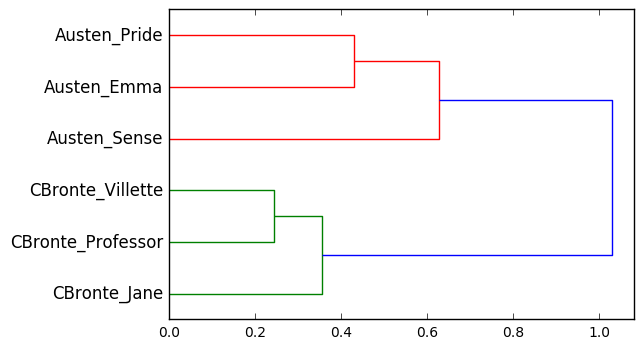

In [53]:
dendrogram(link_matrix, orientation="right", labels=names)